In [1]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt  

# measurements
xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,0.8,2.0])

In [2]:
# GEKKO model
m = GEKKO(remote=False)
# parameters
x = m.Param(value=xm) # correlation we want to fit it to
a = m.FV(value=0.1) # same quantity for all data points, but changes to fit the data
a.STATUS=1 # return value to regressor
b = m.FV(value=0.1) # same quantity for all data points, but changes to fit the data
b.STATUS=1 # return value to regressor

# variables
y = m.CV(value=ym)
y.FSTATUS=1 # update according to measurement

# regression equation
m.Equation(y==0.1*m.exp(a*x) + b)

# regression mode
m.options.IMODE = 2
m.options.E
# optimize
m.solve(disp=False)

Optimized, a = 0.60237974436 and b = -0.033095664637


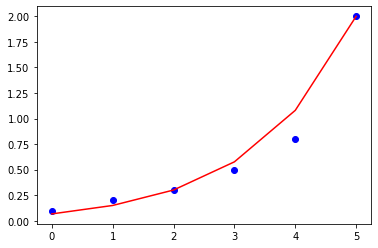

In [3]:
# print parameters
print('Optimized, a = ' + str(a.value[0]) + ' and b = ' + str(b.value[0]))

plt.plot(xm,ym,'bo', label='Data')
plt.plot(x.value, y.value,'r-', label='Regression')
plt.show()